# Mushroom Classification

### Read and import the file

In [2]:
import pandas as pd
import numpy as np
import os
os.chdir('C:/Personal/71053934/Documents/SHAHRZAD/Python/Kaggle/Mushrooms')

df = pd.read_csv('mushrooms.csv')


In [73]:
df.isnull().values.any()

False

In [74]:
df.shape

(8124, 23)

In [75]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

### Get dummy variables

In [6]:
X = df.drop(df[['class']], axis = 1)
X_dummy = pd.get_dummies(X)

Y_dummy = df['class'].apply(lambda x: 1 if x=='e' else 0)

In [66]:
from sklearn import model_selection
from sklearn import tree

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

### Split the train and test data

In [60]:
## option 1
def naive_split(X, Y, n):
    # Take first n lines of X and Y for training and the rest for testing
    X_train = X[:n]
    X_test  = X[n:]
    Y_train = Y[:n]
    Y_test  = Y[n:]
    return (X_train, X_test, Y_train, Y_test)

In [61]:
# option 2

X_train, X_test, Y_train, Y_test = naive_split(X_dummy, Y_dummy, 2800)


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X_dummy, Y_dummy, test_size = 0.7, random_state = 42)
X_train.shape

(2437, 117)

### Descion Tree Classifier

In [62]:
clf = tree.DecisionTreeClassifier(random_state=42)

clf.fit(X_train, Y_train)

predicted = clf.predict(X_test)

from sklearn.metrics import roc_auc_score

print('AUC:', roc_auc_score(Y_test, predicted))

AUC: 0.786763785479


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

score = clf.score(X_test, Y_test)
predicted = clf.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)
precision = precision_score(Y_test, predicted)
recall = recall_score(Y_test, predicted)
f1_score = f1_score(Y_test, predicted)

print('accuracy:{:.2f}'.format(accuracy), 'precision:{:.2f}'.format(precision), 'recall:{:.2f}'.format(recall), 'f1_score:{:.2f}'.format(f1_score))

accuracy:0.74 precision:0.56 recall:0.91 f1_score:0.69


### Effect of training and test size on classifier's accuracy

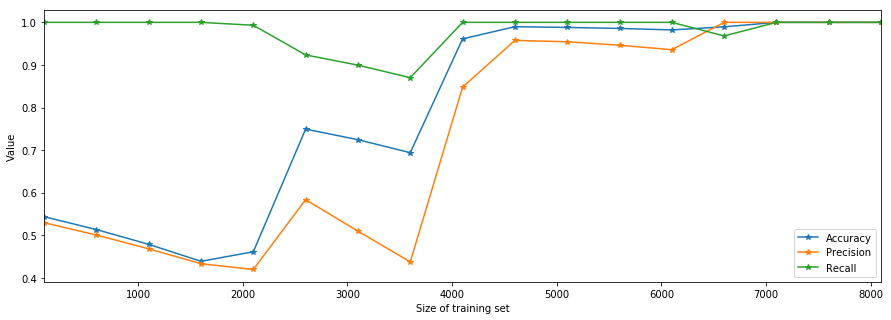

In [72]:
sizes = np.arange(100,len(Y_dummy), 500)
result = {}
for size in sizes:
    X_train, X_test, Y_train, Y_test = naive_split(X_dummy, Y_dummy, size)
    clf.fit(X_train, Y_train)
    score     = clf.score(X_test, Y_test)
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    result[size] = (score, precision, recall)
# Turn the results into a DataFrame
# Transposing is needed (you tryout without it)
result = pd.DataFrame(result).transpose()
result.columns = ['Accuracy', 'Precision', 'Recall']
result.plot(marker='*', figsize=(15,5))
plt.xlabel('Size of training set')
plt.ylabel('Value')
plt.show()